<a href="https://colab.research.google.com/github/MaksymilianSzymczak/ML24/blob/main/domowe_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Understanding Deconvolution in Autoencoders**
---------------

In class, we worked with autoencoders built from multilayer perceptrons (MLPs). However, encoders are often constructed using convolutional architectures to better capture spatial patterns. In this assignment, you'll explore how the decoder can use deconvolutional (transposed convolution) layers to reverse and mirror the operations performed by the convolutional encoder.

While convolutional encoders are relatively well understood, **decoding (or upsampling) the compressed representation** using **deconvolutional layers** (also known as **transposed convolutions**) often raises questions.

This assignment is particularly relevant because deconvolution is a core component of the U-Net architecture, a prominent neural network used extensively in image segmentation tasks.

Your main objective is to deeply understand **how transposed convolution layers work**, and explain them in both words and visuals.


## **The Objective**

Understand and clearly explain how **transposed convolutions** work. Use 2D transposed convolutions and a small grid of 2D points as a working example.

You may need to do some additional reading to complete this assignment.

## **Tasks & Deliverables**

### 1. **Theory Exploration**

Using markdown cells in your Colab notebook, answer the following:

- What is a **transposed convolution**?
- How does it differ from a regular convolution?
- How does it upsample feature maps?
- What are **stride**, **padding**, and **kernel size**, and how do they influence the result in a transposed convolution?
- To earn full two points, your explanation must be detailed enough for a reader to reproduce the upsampling process step by step.


### 2. **Manual Diagram (by your hand, not a generated image)**

Carefully plan and draw **by hand** a diagram or a set of diagrams that:

- Explain the process of using **transposed convolution**.
- Use an example of a **small input grid of 2D points** which gets expanded into a larger output grid.
- Explain how stride, padding, and the kernel shape affect the result.
- Show intermediate steps of the operation, not just input and output.

**Scan or photograph your diagram(s)**, and upload it to your **GitHub repository** for this course.

Then embed it in your Colab notebook using markdown (you can find examples on *how to do it* in previous notebooks related to this class, e.g. the one on linear regression or the one on the MLP network).


### 3. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.


What is a transposed convolution?

Transponowana konwolucja (czyli transposed convolution) to taki trik w sieciach neuronowych, który pozwala nam „odwrócić” zwykłą konwolucję i powiększyć obrazek albo mapę cech do większego rozmiaru. Zamiast ściskać dane jak w klasycznej konwolucji, tutaj każdy piksel wejścia jest „rozsiewany” na większą siatkę za pomocą filtra, a tam gdzie się te rozsiane wartości nakładają, po prostu się sumują. Dzięki temu możemy np. z małej, skompresowanej reprezentacji „odbudować” większy obrazek, co jest bardzo przydatne w dekoderach autoenkoderów czy sieciach typu U-Net do segmentacji obrazów. To nie jest dokładne cofnięcie konwolucji, bo pewne informacje giną w procesie ściskania, ale pozwala na sensowne powiększanie i rekonstrukcję danych. W praktyce transponowana konwolucja działa trochę jak „inteligentne rozciąganie” obrazu, gdzie sieć sama uczy się, jak najlepiej rozmieścić szczegóły na powiększonym wyjściu



How does it differ from a regular convolution?

Transponowana konwolucja, czyli dekonwolucja, powiększa (upsampluje) mapy cech w taki sposób, że bierze małą macierz i „rozciąga” ją do większego rozmiaru. Najpierw między wartościami wejściowymi wstawia zera (w zależności od stride), przez co powstaje większa siatka z wieloma zerami. Następnie na tę nową siatkę nakłada filtr (kernel), przesuwając go po całej macierzy i sumując wyniki tam, gdzie się nakładają. Dzięki temu każdy piksel wejścia „rozlewa się” na większy obszar wyjścia, a sieć może nauczyć się, jak najlepiej odtworzyć szczegóły obrazu podczas powiększania. W skrócie: transponowana konwolucja pozwala sieci zamienić skompresowaną, małą mapę cech z powrotem w większy, bardziej szczegółowy obraz

How does it upsample feature maps?

Oto przykład przeprowadzenia transponowanej konwolucji krok po kroku na innych wartościach niż w poprzednim opisie:

Załóżmy, że mamy macierz wejściową:

$$
\begin{bmatrix}
5 & 1 \\
2 & 3 \\
\end{bmatrix}
$$

Chcemy ją powiększyć za pomocą transponowanej konwolucji z kernelem 2x2 o wartościach:

$$
\begin{bmatrix}
1 & 0 \\
0 & -1 \\
\end{bmatrix}
$$

Stride ustawiamy na 2, padding na 0.

**1. Wstawianie zer (upsampling przez stride):**

Dla stride = 2, pomiędzy wartościami i wierszami wstawiamy po jednym zerze:

$$
\begin{bmatrix}
5 & 0 & 1 \\
0 & 0 & 0 \\
2 & 0 & 3 \\
\end{bmatrix}
$$

**2. Przygotowanie macierzy wyjściowej:**

Rozmiar wyjściowy obliczamy jako:  
$$
n = stride \times (input\_size - 1) + kernel\_size
$$
Dla naszego przykładu:  
$$
n = 2 \times (2 - 1) + 2 = 4
$$
Tworzymy pustą macierz 4x4 wypełnioną zerami.

**3. Nakładanie kernela na niezerowe pozycje:**

Przechodzimy przez macierz po upsamplingu i dla każdej niezerowej wartości nakładamy kernel, mnożąc go przez tę wartość i sumując wyniki w odpowiednich miejscach macierzy wyjściowej.

- Pozycja (0,0): wartość 5  
Nakładamy kernel pomnożony przez 5 na pozycję (0,0):

$$
\begin{bmatrix}
5 & 0 \\
0 & -5 \\
\end{bmatrix}
$$

Dodajemy do macierzy wyjściowej w lewym górnym rogu.

- Pozycja (0,2): wartość 1  
Kernel * 1, pozycja (0,2):

$$
\begin{bmatrix}
1 & 0 \\
0 & -1 \\
\end{bmatrix}
$$

Dodajemy do macierzy wyjściowej od pozycji (0,2).

- Pozycja (2,0): wartość 2  
Kernel * 2, pozycja (2,0):

$$
\begin{bmatrix}
2 & 0 \\
0 & -2 \\
\end{bmatrix}
$$

Dodajemy od pozycji (2,0).

- Pozycja (2,2): wartość 3  
Kernel * 3, pozycja (2,2):

$$
\begin{bmatrix}
3 & 0 \\
0 & -3 \\
\end{bmatrix}
$$

Dodajemy od pozycji (2,2).

**4. Sumowanie nakładających się wartości:**

Po dodaniu wszystkich wyników, macierz wyjściowa wygląda tak:

$$
\begin{bmatrix}
5 & 0 & 1 & 0 \\
0 & -5 & 0 & -1 \\
2 & 0 & 3 & 0 \\
0 & -2 & 0 & -3 \\
\end{bmatrix}
$$

W ten sposób uzyskaliśmy powiększoną mapę cech za pomocą transponowanej konwolucji — każdy element wejścia „rozlał się” po większej macierzy zgodnie z kernelem, a tam gdzie wartości się nakładały, zostały zsumowane.


What are stride, padding, and kernel size, and how do they influence the result in a transposed convolution?

Stride, padding i kernel size to trzy podstawowe parametry, które decydują o tym, jak transponowana konwolucja powiększa mapy cech. Stride (krok) określa, jak bardzo „rozciągamy” dane wejściowe — im większy stride, tym większy przeskok i większa odległość między rozmieszczanymi wartościami, co skutkuje większym wyjściem. Kernel size (rozmiar filtra) to wielkość „okienka”, przez które każdy element wejścia jest rozpraszany na wyjściu — im większy kernel, tym większy wpływ pojedynczego piksela na okolicę w macierzy wyjściowej. Padding w transponowanej konwolucji odpowiada za obcinanie brzegów na końcu operacji, żeby dopasować rozmiar wyjścia — jeśli padding jest większy, to finalna macierz wyjściowa będzie mniejsza, bo obcinamy więcej na brzegach. W skrócie: stride i kernel size zwiększają rozmiar wyjścia, a padding pozwala go precyzyjnie przyciąć.

##2. Manual Diagram (by your hand, not a generated image)

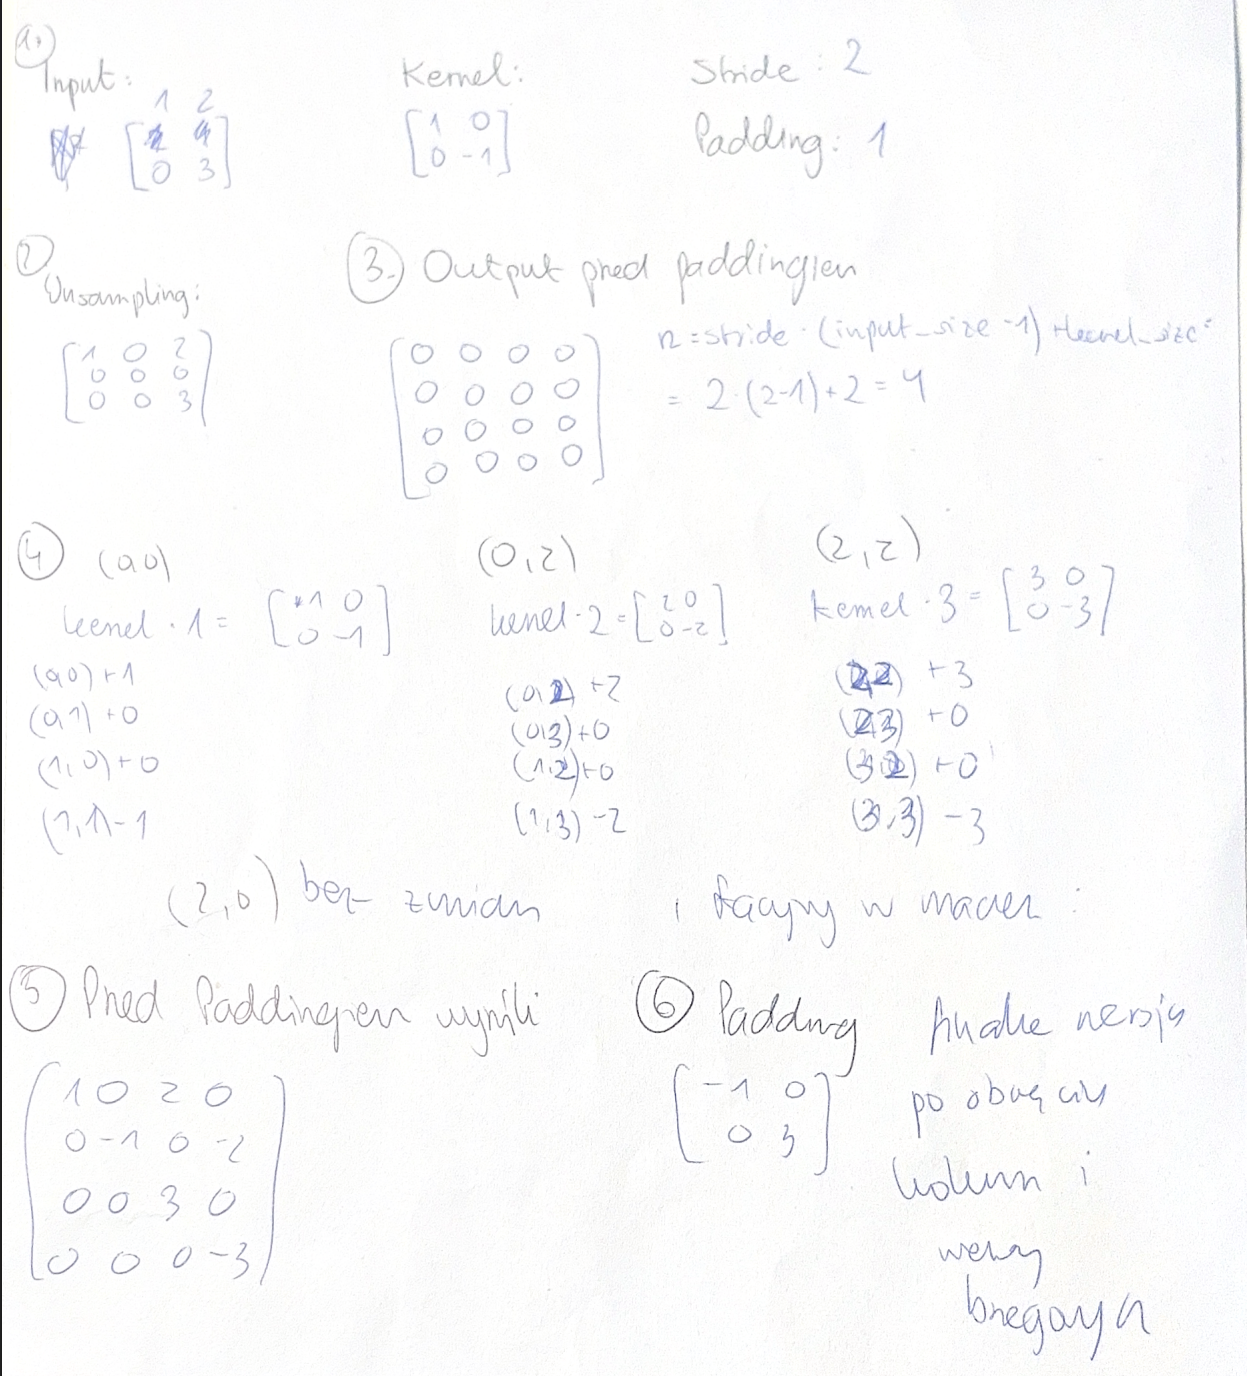